In [7]:
import Pkg
Pkg.activate(".")
Pkg.add(["Plots","Distributions","Random","Polynomials","Statistics","ApproxFun"])

  Activating project at `~/Documents/programming/BME-502-2025`
    Updating registry at `~/.julia/registries/NeurobloxRegistry`
    Updating git-repo `https://github.com/Neuroblox/NeurobloxRegistry`
    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/Documents/programming/BME-502-2025/Project.toml`
    Updating `~/Documents/programming/BME-502-2025/Manifest.toml`
  [05823500] ↑ OpenLibm_jll v0.8.1+2 ⇒ v0.8.1+4
Precompiling project...
    344.2 ms  ✓ OddEvenIntegers
    288.3 ms  ✓ LowRankMatrices
    287.0 ms  ✓ HalfIntegers
    322.4 ms  ✓ Requires
    378.6 ms  ✓ ADTypes
    383.8 ms  ✓ Infinities
    417.6 ms  ✓ Calculus
    286.1 ms  ✓ RecurrenceRelationships
    337.4 ms  ✓ CodecZlib
    608.4 ms  ✓ OffsetArrays
    462.4 ms  ✓ ConcurrentUtilities
    960.8 ms  ✓ Bessels
    879.4 ms  ✓ FastLapackInterface
    666.6 ms  ✓ KLU
    686.1 ms  ✓ Setfield
    480.7 ms  ✓ OpenSSL_jll
    446.1 ms  ✓ Pixman_jll
   1221.4 ms  ✓ T

In [8]:
using Plots, Distributions, Random, Polynomials, Statistics, ApproxFun

[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a] (cache misses: incompatible header (6))


$p_{posterior}$ is proportional to the posterior probability of alpha and beta given the observed data.  The model is that $logit(\theta)=\alpha+dose*\beta$, where theta is the probablity of death for the log drug concentration dose.

$$logit(p)=\log\left( \frac{p}{1-p} \right) =\log(p)-\log(1-p)=-\log\left( \frac{1}{p} - 1\right)$$

The $logit$ function is often used to stretch the value space of a variable that has a range from 0 to 1 (for example a probability).

As you can see below, for each dose the likelihood of the data to be observed $deaths_i$ given the probability of death $\theta_i$ and the number of tries $n_i$:

$$P( deaths_{i} \mid n_{i},\theta_{i}) \propto  \theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

The combined likelihood is the product of all experimental outcomes:

$$P( \{deaths_{i}\} \mid \{n_{i},\theta_{i}\}) \propto  \prod_{i}\theta_{i}^{deaths_{i}}(1-\theta_{i})^{n_{i}-deaths_{i}}$$

In order to use the function with alpha, beta being two-dimensional matrices and dose,obs_deaths and n being one-dimensional arrays, I was forced to interate over dose and then take the product over the first axis.  Let me know if there is an easier and more elegant way.

In [9]:
# experimental data for LD50 test
dose = [-0.86,-0.3,-0.05,0.73]
n = ones(4)*5
nd = [0,1,3,5]

4-element Vector{Int64}:
 0
 1
 3
 5

In [10]:
function invlogit(x)
    return exp(x)/(1+exp(x))
end

invlogit (generic function with 1 method)

In [11]:
function logit(p)
    return log(p/(1-p))
end

logit (generic function with 1 method)

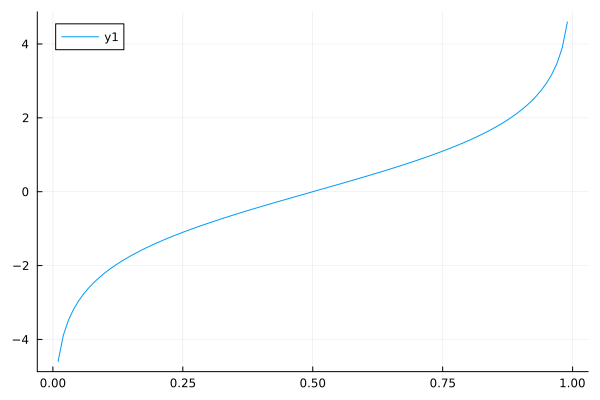

In [12]:
p_range = 0:0.01:1
plot(p_range,logit.(p_range))

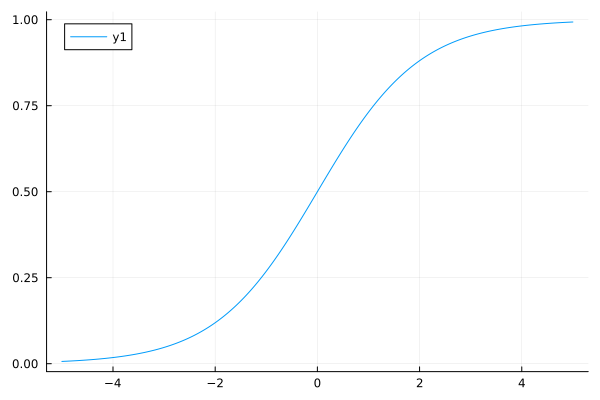

In [13]:
logit_range = -5:0.01:5
plot(logit_range,invlogit.(logit_range))

In [14]:
# trick how to iterate over several list together
for (item1,item2) in zip([2,5,6],[7,9,1])
    println(item1," ",item2)
end

2 7
5 9
6 1


In [15]:
collect(zip([2,5,6],[7,9,1]))

3-element Vector{Tuple{Int64, Int64}}:
 (2, 7)
 (5, 9)
 (6, 1)

In [16]:
function posterior(α, β, dose, deaths, n)
    p_list = []
    for (d,nd,nn) in zip(dose,deaths,n)
        θ = invlogit(α + β*d)
        push!(p_list, θ^nd * (1-θ)^(nn-nd))
    end
    return prod(p_list)
end

posterior (generic function with 1 method)

In [17]:
poster(α, β) = posterior(α, β, dose, nd, n)

poster (generic function with 1 method)

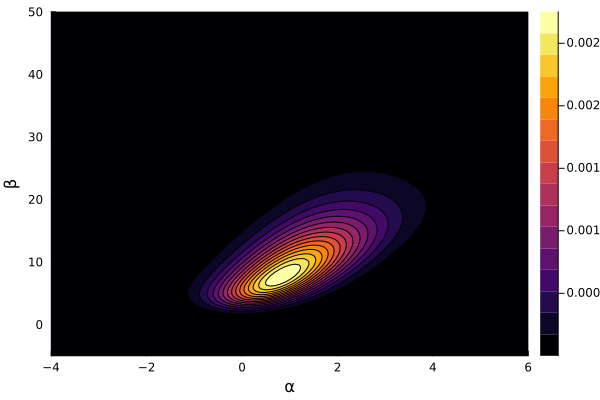

In [18]:
contourf(-4:0.1:6,-5:0.1:50, poster, xlabel="α",ylabel="β")

In [19]:
# visual guess for LD50 conc
-0.7/7

-0.09999999999999999

In [20]:
α_range = -4:0.1:6.0
β_range = -5.0:0.1:50

-5.0:0.1:50.0

In [21]:
α_grid = α_range' .* ones(length(β_range))
β_grid = ones(length(α_range))' .* β_range

551×101 Matrix{Float64}:
 -5.0  -5.0  -5.0  -5.0  -5.0  -5.0  …  -5.0  -5.0  -5.0  -5.0  -5.0  -5.0
 -4.9  -4.9  -4.9  -4.9  -4.9  -4.9     -4.9  -4.9  -4.9  -4.9  -4.9  -4.9
 -4.8  -4.8  -4.8  -4.8  -4.8  -4.8     -4.8  -4.8  -4.8  -4.8  -4.8  -4.8
 -4.7  -4.7  -4.7  -4.7  -4.7  -4.7     -4.7  -4.7  -4.7  -4.7  -4.7  -4.7
 -4.6  -4.6  -4.6  -4.6  -4.6  -4.6     -4.6  -4.6  -4.6  -4.6  -4.6  -4.6
 -4.5  -4.5  -4.5  -4.5  -4.5  -4.5  …  -4.5  -4.5  -4.5  -4.5  -4.5  -4.5
 -4.4  -4.4  -4.4  -4.4  -4.4  -4.4     -4.4  -4.4  -4.4  -4.4  -4.4  -4.4
 -4.3  -4.3  -4.3  -4.3  -4.3  -4.3     -4.3  -4.3  -4.3  -4.3  -4.3  -4.3
 -4.2  -4.2  -4.2  -4.2  -4.2  -4.2     -4.2  -4.2  -4.2  -4.2  -4.2  -4.2
 -4.1  -4.1  -4.1  -4.1  -4.1  -4.1     -4.1  -4.1  -4.1  -4.1  -4.1  -4.1
 -4.0  -4.0  -4.0  -4.0  -4.0  -4.0  …  -4.0  -4.0  -4.0  -4.0  -4.0  -4.0
 -3.9  -3.9  -3.9  -3.9  -3.9  -3.9     -3.9  -3.9  -3.9  -3.9  -3.9  -3.9
 -3.8  -3.8  -3.8  -3.8  -3.8  -3.8     -3.8  -3.8  -3.8  -3.8  -3.8  -3.8


In [22]:
p_grid = poster.(α_grid,β_grid)

551×101 Matrix{Float64}:
 2.18103e-25  3.79789e-25  6.50135e-25  …  2.69409e-41  9.39841e-42
 3.87243e-25  6.822e-25    1.18136e-24     4.8772e-41   1.69647e-41
 6.8108e-25   1.21398e-24  2.12691e-24     8.81023e-41  3.05612e-41
 1.18652e-24  2.13993e-24  3.79353e-24     1.58824e-40  5.49513e-41
 2.04743e-24  3.73634e-24  6.70228e-24     2.85766e-40  9.86322e-41
 3.49942e-24  6.46157e-24  1.17288e-23  …  5.13238e-40  1.76742e-40
 5.92458e-24  1.10682e-23  2.03294e-23     9.20215e-40  3.16215e-40
 9.9363e-24   1.87791e-23  3.49003e-23     1.64728e-39  5.64927e-40
 1.65099e-23  3.1562e-23   5.93447e-23     2.94439e-39  1.00788e-39
 2.71815e-23  5.25518e-23  9.99563e-23     5.25549e-39  1.79582e-39
 4.43491e-23  8.66969e-23  1.66784e-22  …  9.36828e-39  3.19594e-39
 7.1724e-23   1.41736e-22  2.75723e-22     1.6679e-38   5.68125e-39
 1.15002e-22  2.29669e-22  4.5168e-22      2.96606e-38  1.00886e-38
 ⋮                                      ⋱               ⋮
 3.09879e-17  4.61899e-17  6.8843

In [24]:
β_marg = vec(mean(p_grid,dims=2))
α_marg = vec(mean(p_grid,dims=1))

101-element Vector{Float64}:
 1.3366743373506462e-10
 2.1050011125962182e-10
 3.3120524397989476e-10
 5.20613545226112e-10
 8.174423460853166e-10
 1.2819363080137004e-9
 2.00761865933416e-9
 3.139295085069951e-9
 4.90051797624152e-9
 7.635277535573939e-9
 1.1870939998411702e-8
 1.8412667109671147e-8
 2.8484059135484016e-8
 ⋮
 7.823475078320794e-6
 6.691212992676177e-6
 5.7180606032426706e-6
 4.882668870760425e-6
 4.1663372052668895e-6
 3.5527319088375716e-6
 3.027623916715308e-6
 2.5786472050733452e-6
 2.1950783068972906e-6
 1.8676366929188614e-6
 1.5883052865300501e-6
 1.350170050395239e-6

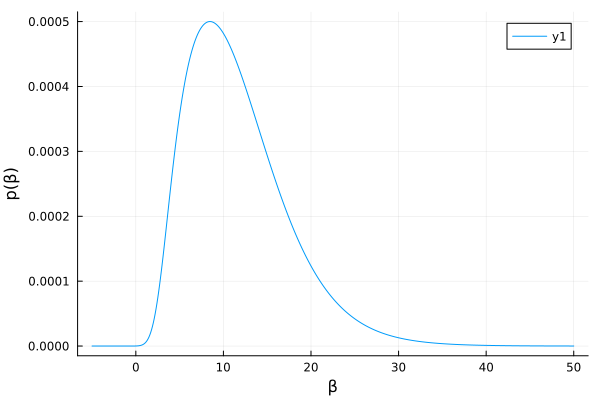

In [26]:
plot(β_range,β_marg,xlabel="β",ylabel="p(β)")

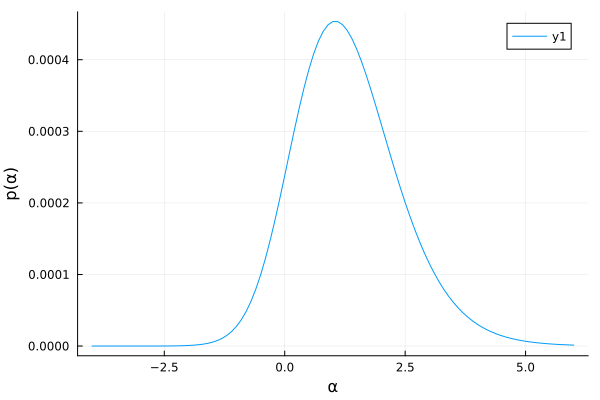

In [27]:
plot(α_range,α_marg,xlabel="α",ylabel="p(α)")

In [28]:
function α_avg(β)
    p = poster.(α_range,β)
    return mean(p)
end

α_avg (generic function with 1 method)

In [29]:
function β_avg(α)
    p = poster.(α,β_range)
    return mean(p)
end

β_avg (generic function with 1 method)

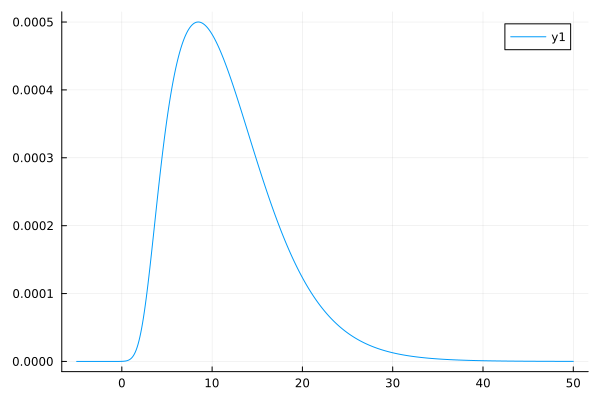

In [30]:
plot(β_range,α_avg.(β_range))

In [32]:
p_β = Fun(α_avg,-5..50)

Fun(Chebyshev(-5 .. 50), [8.46805e-5, -6.97663e-5, -9.70986e-5, 0.000132525, -3.07062e-5, -6.75956e-5, 7.4624e-5, -2.06208e-5, -2.61729e-5, 3.54151e-5  …  -2.80561e-20, 1.65956e-20, 1.83245e-21, -1.99106e-20, 2.69682e-20, -1.88505e-20, 4.47802e-21, 7.70129e-21, -1.35272e-20, 1.01129e-20])

In [33]:
β_sample = ApproxFun.sample(p_β,1000)

1000-element Vector{Float64}:
 10.00550845648105
  5.399011121177342
  8.542797724870912
 12.972798694522307
 15.892438960474085
 11.203257054106341
 12.779159229230306
  9.384599040764154
  2.391068060261201
  9.418874790487788
  5.211947538689774
  9.335081788998867
  4.159819538290801
  ⋮
 10.941751761313494
 12.97851370182757
  3.1598600005242794
  2.8444383380829485
  7.597636793524192
 10.765585657343326
 10.122185610818715
 22.045796427459603
 15.654608290376846
 10.950141968640406
 23.9946725474452
 14.043733913313066

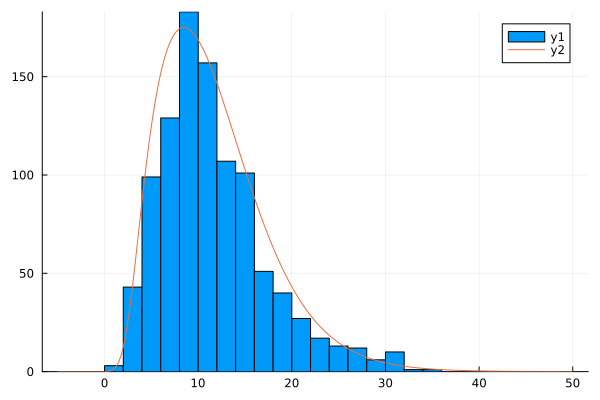

In [37]:
histogram(β_sample, bin=30)
plot!(β_range,350000*α_avg.(β_range))

In [40]:
α_sample = []
for β_i in β_sample
    α_sampler = Fun(x->poster(x,β_i),-4..6)
    push!(α_sample,ApproxFun.sample(α_sampler,1)[1])
end

In [41]:
α_sample

1000-element Vector{Any}:
  3.068602233706578
  1.1012514510863483
 -0.11401636206682753
  1.2893127206382573
  1.4697325245205164
  1.4949360608711473
  2.469432756708251
  1.7157050344982352
  0.21008176597776895
  0.7616287163151938
  0.007100145288298165
  1.4513424419638667
 -0.0464137377566729
  ⋮
  0.8568510566786571
  0.883281658694365
 -0.004160325821423783
  0.6018448512936416
  0.7226883870082403
  0.6453330803440096
  0.5625350111974328
  1.5259396612761336
 -0.964127390236392
  1.4744287436921368
  1.2722770517480555
  1.4924470215229704

In [44]:
ld50_sample = -α_sample ./ β_sample

1000-element Vector{Float64}:
 -0.30669128381165844
 -0.2039728065694746
  0.013346489726063414
 -0.09938585736188618
 -0.09247998549347099
 -0.1334376292225846
 -0.19323906310360497
 -0.18282134666016925
 -0.0878610565166512
 -0.08086196422149809
 -0.0013622825701125655
 -0.1554718506777555
  0.011157632519737507
  ⋮
 -0.07831022631204321
 -0.06805722742889933
  0.0013166171351684907
 -0.21158653476006228
 -0.09512015468075813
 -0.05994407558346077
 -0.0555744611713293
 -0.06921680812472111
  0.061587449034356076
 -0.13464928107002483
 -0.05302331378902353
 -0.10627138272024454

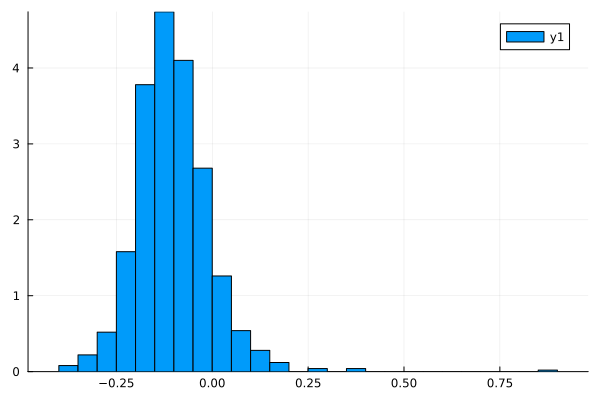

In [45]:
histogram(ld50_sample, normalize=true)

In [46]:
mean(ld50_sample)

-0.10252203657563946

In [47]:
std(ld50_sample)

0.0967562466508335